In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
#to check the missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [12]:
x = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [10]:
from sklearn.cluster import KMeans

In [14]:
#to find wcss
wcss = []
for i in range (1,11):
  km = KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

In [15]:
wcss

[157595857524.96133,
 113217528878.79834,
 80332414178.02908,
 64855545845.90139,
 53116919722.49527,
 46805183376.88748,
 41158639123.821434,
 36568256196.224686,
 33165003924.28952,
 30256977401.640076]

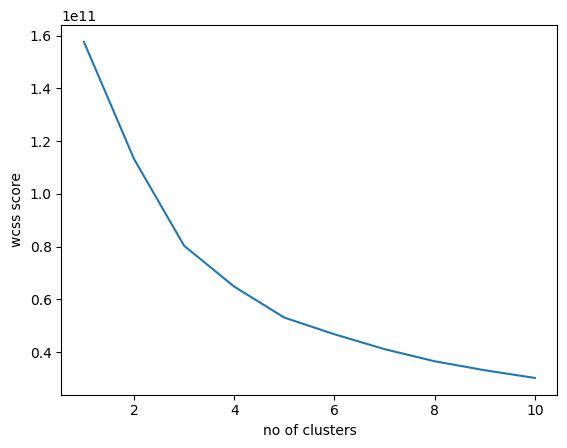

In [17]:
# Plot the WCSS values
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss score')
plt.show()

In [18]:
#for clustering
km = KMeans(n_clusters=5,n_init=20)
km.fit(x)

KMeans(n_clusters=5, n_init=20)

In [21]:
#to predict the cluster labels
cluster_labels = km.predict(x)

In [22]:
cluster_labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 4, 2, 2, 1, 1,
       0, 1, 1, 3, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 3,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 3, 4,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 4, 0, 2, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 4, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       4, 0, 0, 0, 0, 4, 1, 4, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 4, 2, 2,
       2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 4, 4, 0, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 4, 2, 4, 2,
       0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2,

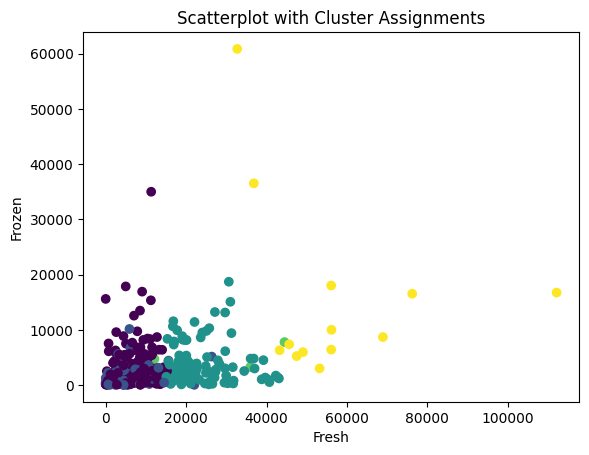

In [36]:
#to plot the scatterplot
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.title('Scatterplot with Cluster Assignments')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()


In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [40]:
# Initialize DBSCAN with eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [41]:
# Fit DBSCAN to the scaled data
dbscan.fit(x_scaled)

DBSCAN()

In [42]:
# Extract cluster labels
cluster_labels = dbscan.labels_

In [45]:
# Extracting the 'Fresh' and 'Frozen' columns from X_scaled
fresh = x_scaled[:, 0]
frozen = x_scaled[:, 5]

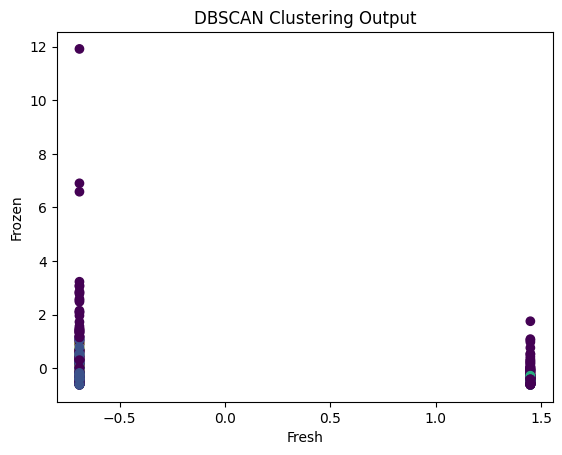

In [46]:
# Plotting the scatterplot
plt.scatter(fresh, frozen, c=cluster_labels)
plt.title('DBSCAN Clustering Output')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

In [47]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


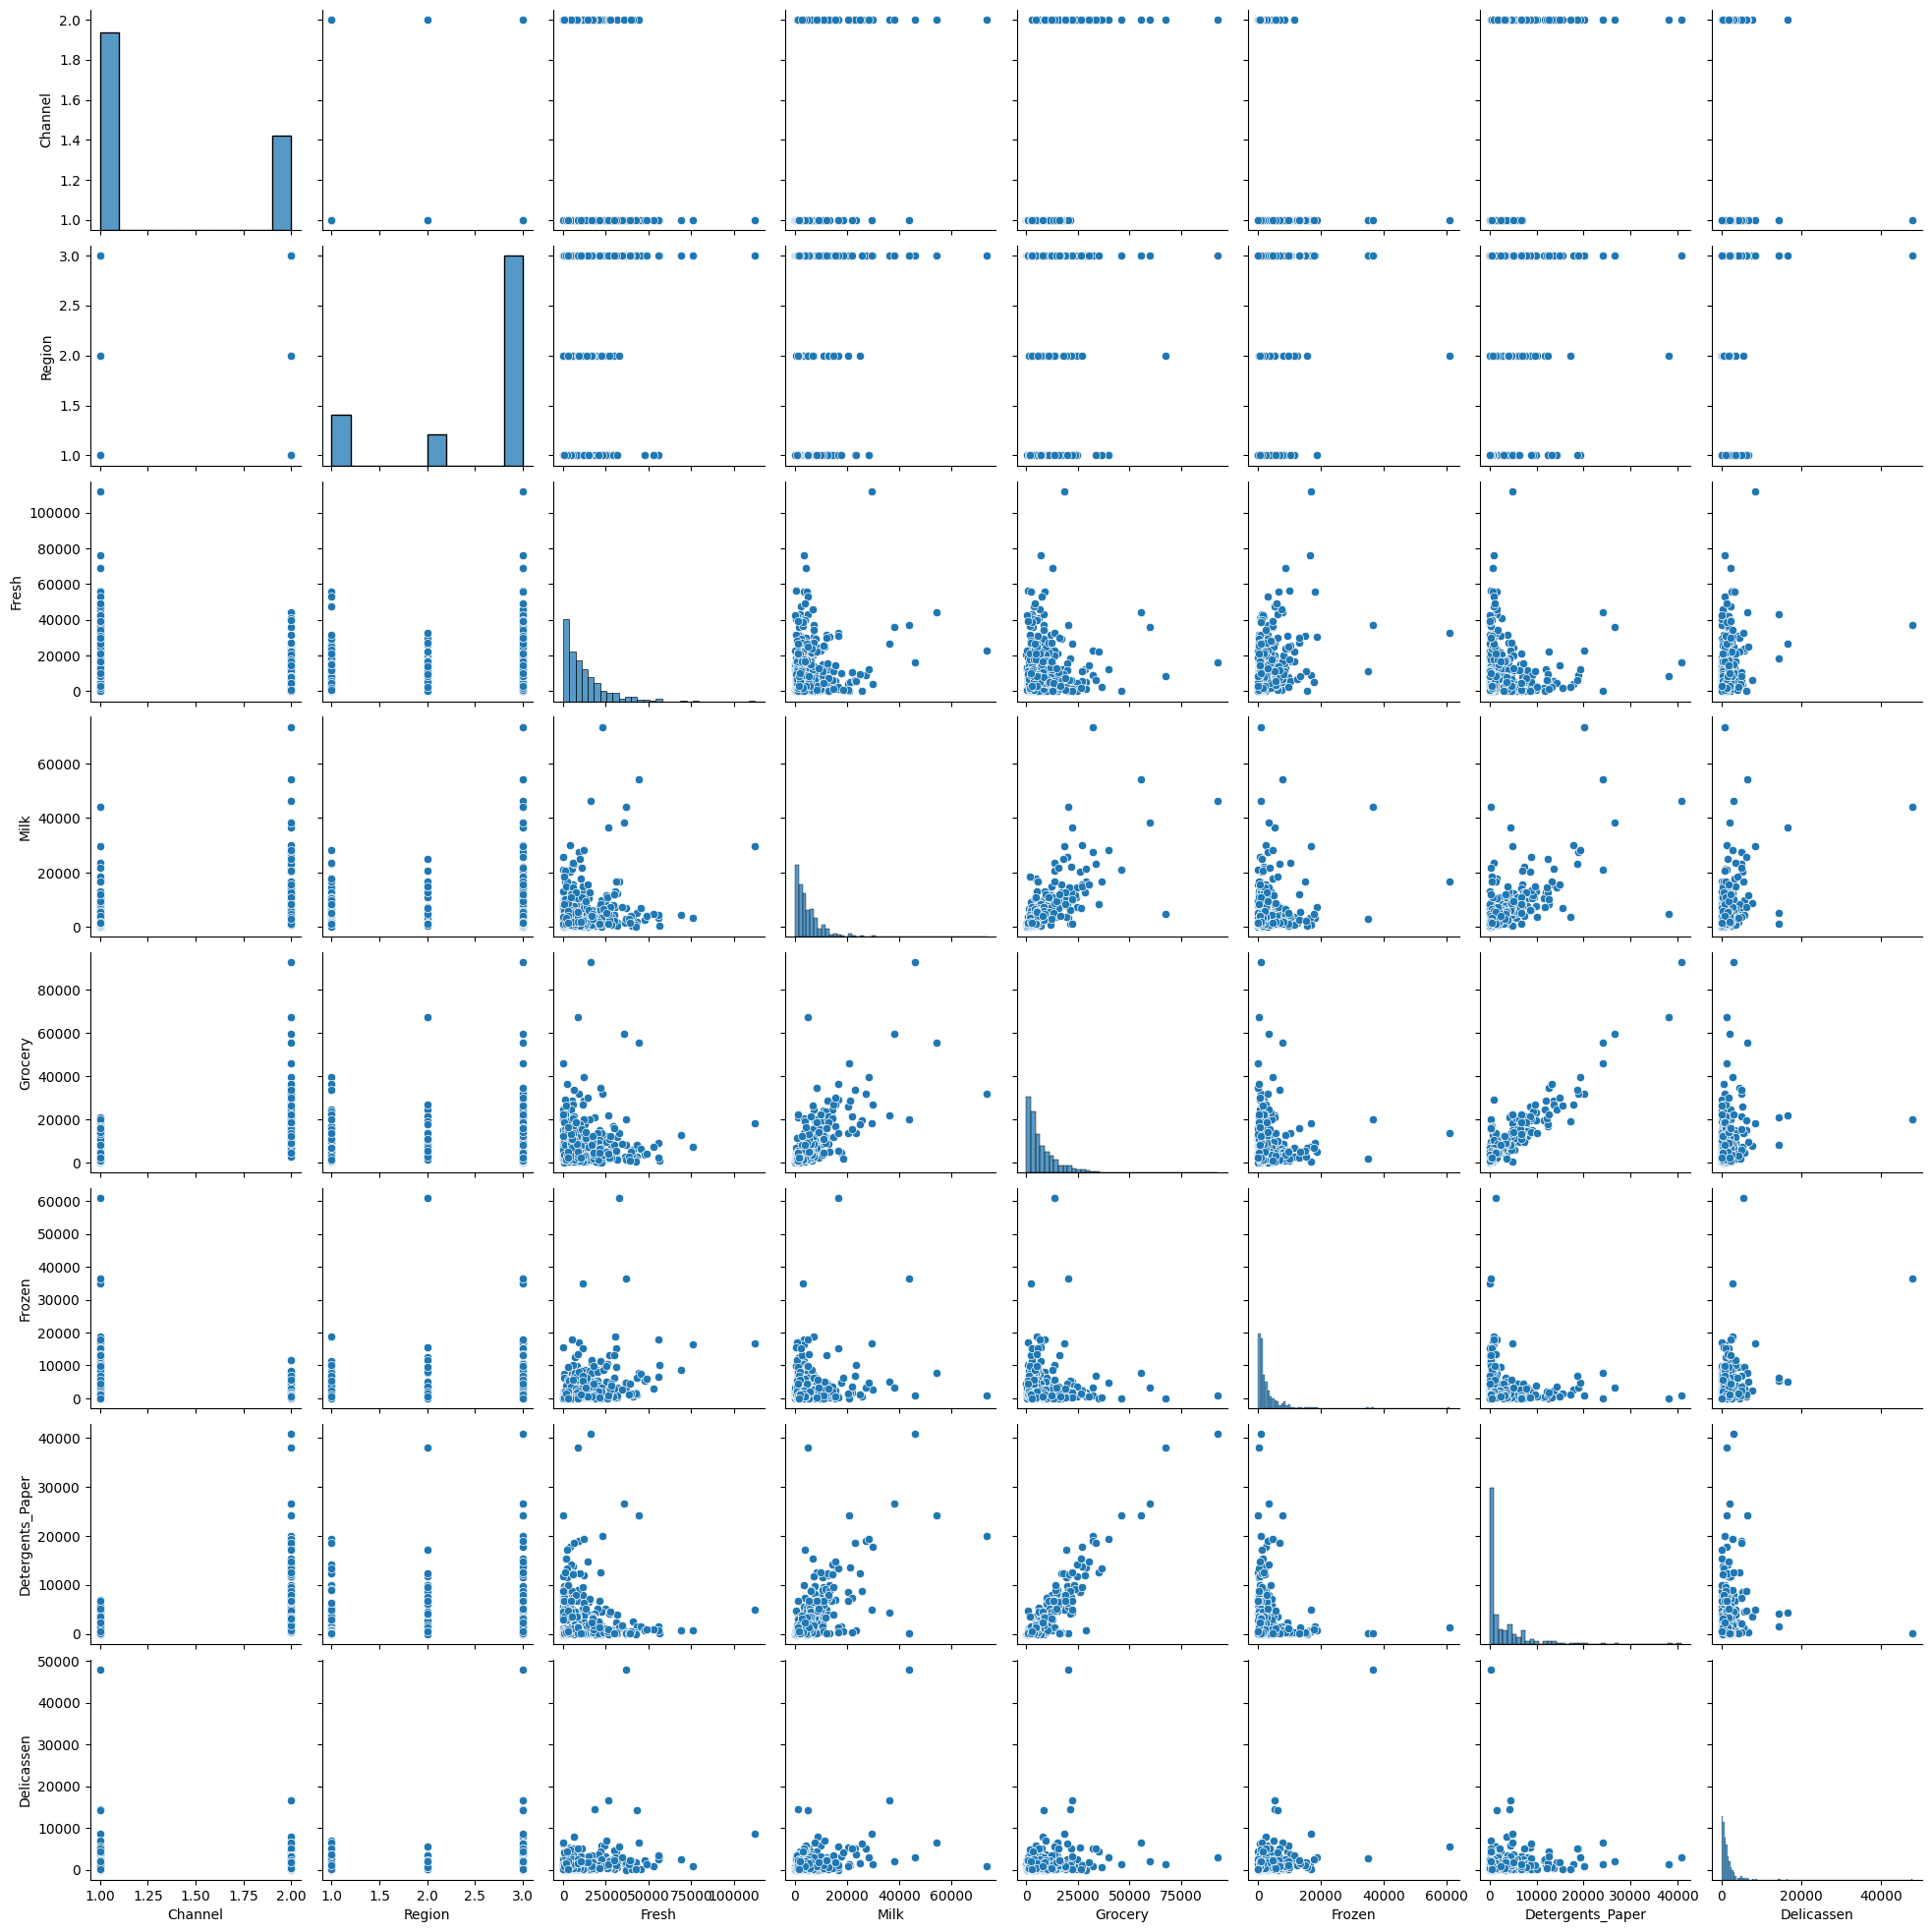

In [48]:
#to create pairplot
sns.pairplot(data)

In [49]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [50]:
data.var()

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64

In [53]:
#to standardize the data
#scaling
from sklearn.preprocessing import scale

In [54]:
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [55]:
#to convert into dataframe
X = pd.DataFrame(scale(data),index = data.index,columns = data.columns)

In [56]:
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [57]:
#to perform PCA
from sklearn.decomposition import PCA

In [58]:
pc = PCA()

In [59]:
pc_array = pc.fit_transform(X)

In [60]:
pc_array.shape

(440, 8)

In [61]:
#to reduce components
pc = PCA(n_components=3)

In [62]:
pc_array = pc.fit_transform(X)

In [63]:
pc_array.shape

(440, 3)

In [64]:
pc_data = pd.DataFrame(pc_array,columns = ["pc1","pc2","pc3"])

In [65]:
pc_data.head()

,pc1,pc2,pc3
0,0.843939,-0.515351,-0.767632
1,1.062676,-0.484601,-0.672975
2,1.269141,0.682055,-0.664095
3,-1.056782,0.610821,-0.505654
4,0.634030,0.974199,-0.771209


In [69]:
#correlation matrix
pc_data.corr().round()

,pc1,pc2,pc3
pc1,1.0,-0.0,0.0
pc2,-0.0,1.0,-0.0
pc3,0.0,-0.0,1.0


In [70]:
#explained variance ratio of pca
pc.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173])

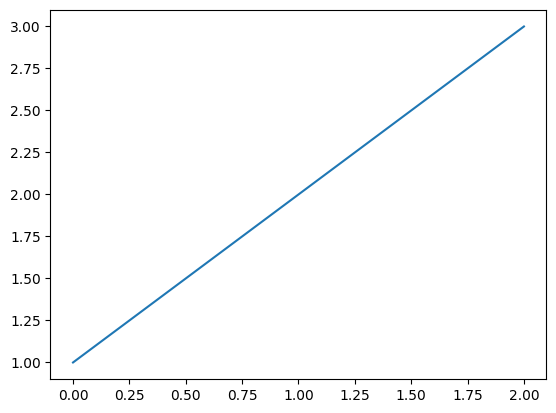

In [71]:
#plot the explained variance ratio of pca
plt.plot([1,2,3]),pc.explained_variance_ratio_
plt.show()